In [58]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=7.349720874970004 et b_1=5.199998734188469


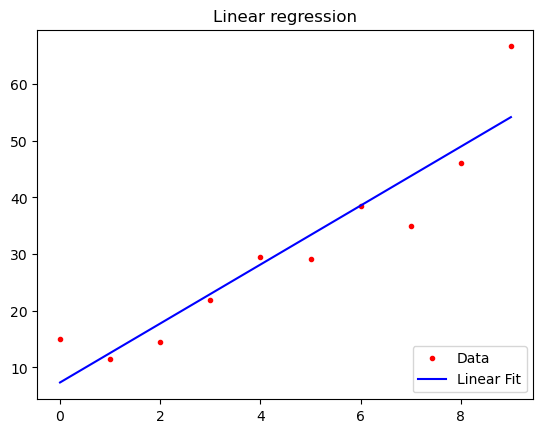

In [59]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [60]:
# With outliers
print("Avec outliers")
for i in range(5):
    x,y = generate_data(n_samples=10, outlier=True)
    lr.fit(x[:, np.newaxis], y)
    print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]) +' avec s2='+str(s2(y, lr.predict(x[:, np.newaxis]))))

# Without outliers
print("Sans outliers")
for i in range(5):
    x,y = generate_data(n_samples=10, outlier=False)
    lr.fit(x[:, np.newaxis], y)
    print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]) +' avec s2='+str(s2(y, lr.predict(x[:, np.newaxis]))))



Avec outliers
b_0=6.517301542873728 et b_1=5.782764129634546 avec s2=46.3900744396573
b_0=9.216664594451885 et b_1=4.675634534762025 avec s2=67.29127726611345
b_0=7.013812293440559 et b_1=5.298275733374289 avec s2=49.648573410173654
b_0=7.201773209410469 et b_1=5.423145023517495 avec s2=36.71462223362764
b_0=6.583741795738227 et b_1=5.08755452641554 avec s2=47.72675813706414
Sans outliers
b_0=6.005316012377445 et b_1=4.421270122582779 avec s2=4.754986055107339
b_0=9.482055630460419 et b_1=4.245582721930491 avec s2=13.454421692754416
b_0=10.753350524381947 et b_1=3.968187172394382 avec s2=6.189787475534506
b_0=7.245227137178588 et b_1=4.3811800571621795 avec s2=9.543291743609222
b_0=11.075939661265906 et b_1=3.579925266704713 avec s2=3.9179955094761088


La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [61]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


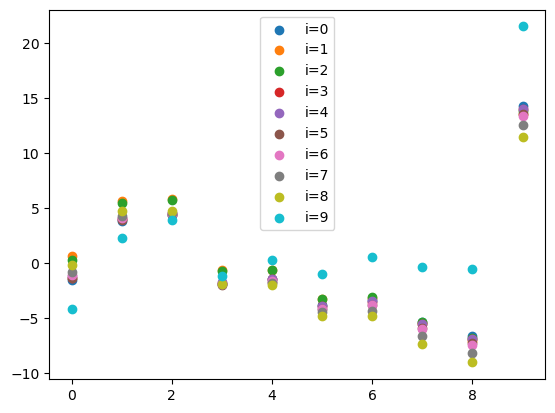

In [70]:
def profil_residuel(x, y, i):
    x_del_i = np.delete(x, i)
    y_del_i = np.delete(y, i)
    lr.fit(x_del_i[:, np.newaxis], y_del_i)
    return y - lr.coef_[0]*x - lr.intercept_

colors = plt.cm.tab10(np.linspace(0, 1, len(x)))
for i in range(len(x)):
    e_pred_i = profil_residuel(x, y, i)
    plt.scatter(x, e_pred_i, color=colors[i], label=f'i={i}')
plt.legend()




In [63]:
...

Ellipsis

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

errors squared: 344.5778052354899
errors squared: 351.8339811940017
errors squared: 349.4886817184663
errors squared: 344.15948161956385
errors squared: 343.95836237012475
errors squared: 345.50579060857945
errors squared: 345.61143507650473
errors squared: 351.3667928563915
errors squared: 363.8888466786731
errors squared: 503.4923538357244


Text(0.5, 1.0, "Cook's distance")

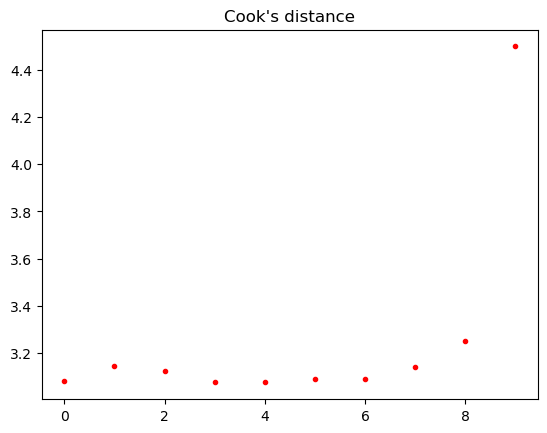

In [64]:
s2_val = s2(y, lr.predict(x[:, np.newaxis]))
def cook(x, y, i):
    e_pred_i = profil_residuel(x, y, i)
    cook = np.sum(e_pred_i**2) / (2*s2_val)
    print("errors squared:", np.sum(e_pred_i**2))
    return cook

e_cooks = [cook(x, y, i) for i in range(len(x))]
e_cooks = np.array(e_cooks)
plt.plot(np.arange(len(x)), e_cooks, 'r.')
plt.title("Cook's distance")


#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [65]:
...

Ellipsis

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
* $\mathbb{E}[\epsilon_i] = 0$,
* $\mathbb{V}[\epsilon_i] = \sigma^2$,
* $\forall i \neq j,\ \mathrm{Cov}(\epsilon_i, \epsilon_j) = 0$,

on a : 

* $\mathbb{E}[\hat{\beta}_0] = \beta_0$,
* $\mathbb{E}[\hat{\beta}_1] = \beta_1$,
* $\mathbb{V}[\hat{\beta}_0] = \sigma^2\left(\frac{1}{n} + \frac{\bar{x}_n^2}{\sum_{i=1}^n (x_i - \bar{x}_n)^2}\right)$,
* $\mathbb{V}[\hat{\beta}_1] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x}_n)^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta}_1 \sim \mathcal{N}\left(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x}_n)^2}\right)$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \chi^2(n-2)$,
* $\hat{\beta}_1$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon}_i^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que :

$$
\frac{ \frac{ \hat{\beta}_1-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x}_n)^2}}}}{\sqrt{\frac{(n-2)s^2/\sigma^2}{n-2}}}
= \frac{\hat{\beta}_1-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x}_n)^2}}}
= T_n \sim t(n-2)
$$

où $t(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse $H_0 : \beta_1 = 0$ en prenant un risque de 5%. 

In [67]:
from scipy.stats import t


...

Ellipsis